In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
import numpy as np
import random
from datetime import timedelta

In [3]:
#read the dataset and transform them

In [4]:
df=pd.read_csv("Assessment exercise dataset - orders.csv")

In [5]:
df

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,True,3.6
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,Breakfast,True,1.9
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,Breakfast,True,1.7
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,Breakfast,True,3.0
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,Breakfast,True,3.0
...,...,...,...,...,...,...,...
534265,7383295241752,314285338626,2022-01-28 22:25:04 UTC,Αλεξανδρούπολη,Street food,True,11.9
534266,7383425578320,586121418057,2022-01-28 22:39:29 UTC,Αλεξανδρούπολη,Street food,True,9.9
534267,7364485291992,29082002418,2022-01-24 19:29:34 UTC,Αλεξανδρούπολη,Street food,True,15.1
534268,7231345759480,348528607896,2022-01-05 18:28:41 UTC,Αλεξανδρούπολη,Street food,True,14.7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534270 entries, 0 to 534269
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   order_id         534270 non-null  int64  
 1   user_id          534270 non-null  int64  
 2   order_timestamp  534270 non-null  object 
 3   city             534270 non-null  object 
 4   cuisine          534270 non-null  object 
 5   paid_cash        534270 non-null  bool   
 6   amount           534270 non-null  float64
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 25.0+ MB


In [7]:
df.isnull().sum()

order_id           0
user_id            0
order_timestamp    0
city               0
cuisine            0
paid_cash          0
amount             0
dtype: int64

In [8]:
df['cuisine'].unique()

array(['Breakfast', 'Italian', 'Meat', 'Street food'], dtype=object)

In [9]:
df['city'].unique()

array(['Αίγιο', 'Αγρίνιο', 'Λιβαδειά', 'Λαμία', 'Βόλος', 'Λάρισα',
       'Ιωάννινα', 'Φλώρινα', 'Νάουσα', 'Δράμα', 'Ξάνθη',
       'Αλεξανδρούπολη', 'Ρόδος', 'Άργος', 'Ναύπλιο', 'Ζάκυνθος',
       'Μεσολόγγι', 'Λευκάδα', 'Θήβα', 'Άρτα', 'Γρεβενά', 'Γιαννιτσά',
       'Βέροια', 'Αλεξάνδρεια', 'Ορεστιάδα', 'Διδυμότειχο', 'Λέρος',
       'Γύθειο', 'Αμαλιάδα', 'Ναύπακτος', 'Αράχωβα', 'Έδεσσα', 'Αίγινα',
       'Νάξος', 'Αλίαρτος', 'Οινόφυτα', 'Μεγαλόπολη', 'Ιστιαία',
       'Μύκονος', 'Λεωνίδιο', 'Βασιλικό', 'Γαργαλιάνοι', 'Αριδαία',
       'Φιλιατρά', 'Ηγουμενίτσα', 'Άνδρος'], dtype=object)

In [10]:
df['order_date'] = pd.to_datetime(df['order_timestamp'],infer_datetime_format=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534270 entries, 0 to 534269
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   order_id         534270 non-null  int64              
 1   user_id          534270 non-null  int64              
 2   order_timestamp  534270 non-null  object             
 3   city             534270 non-null  object             
 4   cuisine          534270 non-null  object             
 5   paid_cash        534270 non-null  bool               
 6   amount           534270 non-null  float64            
 7   order_date       534270 non-null  datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 29.0+ MB


In [12]:
df.drop("order_timestamp", axis=1, inplace=True)

In [13]:
df=df.sort_values(by='order_date',ascending=True)

In [14]:
df['month'] = pd.to_datetime(df['order_date']).dt.month

In [15]:
df['day']=df['order_date'].dt.day_name()

In [16]:
df['hour'] = pd.to_datetime(df['order_date']).dt.hour

In [17]:
df

,order_id,user_id,city,cuisine,paid_cash,amount,order_date,month,day,hour
423838,7202715412520,324194370654,Ρόδος,Meat,True,15.70,2022-01-01 00:06:07+00:00,1,Saturday,0
400598,7202716839988,589959505422,Ξάνθη,Meat,True,2.20,2022-01-01 00:12:38+00:00,1,Saturday,0
265457,7202717043912,13585910667,Ρόδος,Meat,True,5.70,2022-01-01 00:13:01+00:00,1,Saturday,0
385888,7202718325720,12452144964,Ρόδος,Meat,False,7.10,2022-01-01 00:16:42+00:00,1,Saturday,0
84663,7202718500512,339443474076,Βόλος,Breakfast,True,7.00,2022-01-01 00:17:11+00:00,1,Saturday,0
...,...,...,...,...,...,...,...,...,...,...
440325,7404764768320,48778318953,Λάρισα,Meat,True,5.70,2022-01-31 23:59:17+00:00,1,Monday,23
24987,7404765059640,169301119407,Ξάνθη,Breakfast,False,5.20,2022-01-31 23:59:25+00:00,1,Monday,23
483696,7404765613148,29730071847,Λάρισα,Street food,True,9.75,2022-01-31 23:59:35+00:00,1,Monday,23
526260,7404765671412,102344123049,Ιωάννινα,Meat,True,7.50,2022-01-31 23:59:37+00:00,1,Monday,23


In [18]:
#take only the breakfast data in order to find the breakfast basket and efood all for 1000 orders

In [19]:
df_break=df[df['cuisine']=='Breakfast']

In [20]:
basket_data_break= df_break.groupby(['city']).agg({
        'order_id': 'count',
        'amount': 'sum'})

In [21]:
basket_data_break=basket_data_break.sort_values(by='order_id',ascending=False)

In [22]:
basket_data_break['breakfast_basket']=basket_data_break['amount']/basket_data_break['order_id']

In [23]:
basket_data_break_1000=basket_data_break[basket_data_break['order_id']>1000]

In [24]:
basket_data_break_1000

,order_id,amount,breakfast_basket
city,,,
Βόλος,36454,186928.32,5.127786
Λάρισα,22075,119303.82,5.404477
Ξάνθη,21938,107214.05,4.887139
Ιωάννινα,21572,124157.82,5.755508
Ρόδος,17335,108320.95,6.248685
Αγρίνιο,14853,55768.37,3.754687
Λαμία,14124,53624.83,3.796717
Αλεξανδρούπολη,10938,55351.48,5.060475
Δράμα,8256,45053.11,5.457014


In [25]:
basket_data_all= df.groupby(['city']).agg({
        'order_id': 'count',
        'amount': 'sum'})

In [26]:
basket_data_all=basket_data_all.sort_values(by='order_id',ascending=False)

In [27]:
basket_data_all['efood_basket']=basket_data_all['amount']/basket_data_all['order_id']

In [28]:
basket_data_all_1000=basket_data_all[basket_data_all['order_id']>1000]

In [29]:
basket_data_all_1000

,order_id,amount,efood_basket
city,,,
Λάρισα,84943,756583.23,8.906952
Βόλος,77529,626757.01,8.084162
Ιωάννινα,67972,619766.41,9.117966
Ρόδος,50730,523158.73,10.312610
Ξάνθη,49401,357272.11,7.232083
Λαμία,36008,305046.83,8.471640
Αγρίνιο,33332,234225.96,7.027060
Αλεξανδρούπολη,24933,211504.86,8.482929
Δράμα,19173,159947.63,8.342337


In [30]:
#take only the breakfast data in order to find the breakfast frequency and efood all for 1000 orders

In [31]:
merge1=pd.merge(basket_data_break_1000, basket_data_all_1000, left_index=True, right_index=True)

In [32]:
freq_break= df_break.groupby(['city']).agg({
        'order_id': 'count',
'user_id':'nunique'})

In [33]:
freq_break=freq_break.sort_values(by='order_id',ascending=False)

In [34]:
freq_break['breakfast_freq']=freq_break['order_id']/freq_break['user_id']

In [35]:
freq_break_1000=freq_break[freq_break['order_id']>1000]

In [36]:
freq_break_1000

,order_id,user_id,breakfast_freq
city,,,
Βόλος,36454,9766,3.732746
Λάρισα,22075,7130,3.096073
Ξάνθη,21938,5136,4.271417
Ιωάννινα,21572,6925,3.115090
Ρόδος,17335,4666,3.715174
Αγρίνιο,14853,3284,4.522838
Λαμία,14124,3164,4.463970
Αλεξανδρούπολη,10938,3128,3.496803
Δράμα,8256,2239,3.687360


In [37]:
merge2=pd.merge(merge1,freq_break_1000, left_index=True, right_index=True)

In [38]:
freq_all= df.groupby(['city']).agg({
        'order_id': 'count',
'user_id':'nunique'})

In [39]:
freq_all=freq_all.sort_values(by='order_id',ascending=False)

In [40]:
freq_all['efood_freq']=freq_all['order_id']/freq_all['user_id']

In [41]:
freq_all_1000=freq_all[freq_all['order_id']>1000]

In [42]:
freq_all_1000

,order_id,user_id,efood_freq
city,,,
Λάρισα,84943,22088,3.845663
Βόλος,77529,17499,4.430482
Ιωάννινα,67972,16861,4.031315
Ρόδος,50730,11155,4.547736
Ξάνθη,49401,9227,5.353961
Λαμία,36008,7389,4.873190
Αγρίνιο,33332,6547,5.091187
Αλεξανδρούπολη,24933,6642,3.753839
Δράμα,19173,4232,4.530482


In [43]:
merge3=pd.merge(merge2,freq_all_1000, left_index=True, right_index=True)

In [44]:
merge3

,order_id_x,amount_x,breakfast_basket,order_id_y,amount_y,efood_basket,order_id_x,user_id_x,breakfast_freq,order_id_y,user_id_y,efood_freq
city,,,,,,,,,,,,
Βόλος,36454,186928.32,5.127786,77529,626757.01,8.084162,36454,9766,3.732746,77529,17499,4.430482
Λάρισα,22075,119303.82,5.404477,84943,756583.23,8.906952,22075,7130,3.096073,84943,22088,3.845663
Ξάνθη,21938,107214.05,4.887139,49401,357272.11,7.232083,21938,5136,4.271417,49401,9227,5.353961
Ιωάννινα,21572,124157.82,5.755508,67972,619766.41,9.117966,21572,6925,3.115090,67972,16861,4.031315
Ρόδος,17335,108320.95,6.248685,50730,523158.73,10.312610,17335,4666,3.715174,50730,11155,4.547736
Αγρίνιο,14853,55768.37,3.754687,33332,234225.96,7.027060,14853,3284,4.522838,33332,6547,5.091187
Λαμία,14124,53624.83,3.796717,36008,305046.83,8.471640,14124,3164,4.463970,36008,7389,4.873190
Αλεξανδρούπολη,10938,55351.48,5.060475,24933,211504.86,8.482929,10938,3128,3.496803,24933,6642,3.753839
Δράμα,8256,45053.11,5.457014,19173,159947.63,8.342337,8256,2239,3.687360,19173,4232,4.530482


In [45]:
merge3=merge3[['breakfast_basket', 'efood_basket','breakfast_freq','efood_freq']]

In [46]:
merge3.head()

,breakfast_basket,efood_basket,breakfast_freq,efood_freq
city,,,,
Βόλος,5.127786,8.084162,3.732746,4.430482
Λάρισα,5.404477,8.906952,3.096073,3.845663
Ξάνθη,4.887139,7.232083,4.271417,5.353961
Ιωάννινα,5.755508,9.117966,3.115090,4.031315
Ρόδος,6.248685,10.312610,3.715174,4.547736


In [47]:
#users that exceed 3 orders for total efood

In [48]:
freq = df.groupby(['user_id','city'])['order_id'].agg('count').reset_index()
freq_over_three=freq[freq['order_id']>3]
display(freq_over_three)


,user_id,city,order_id
2,110361993,Ρόδος,11
4,144777339,Αίγιο,14
5,145424244,Ρόδος,12
10,186049878,Ρόδος,4
11,187990593,Ρόδος,10
...,...,...,...
123857,684331300632,Βόλος,4
123935,684616585737,Γρεβενά,6
123951,684686063334,Βέροια,5
124003,684837697866,Ναύπακτος,7


In [49]:
freq_over_three=pd.merge(freq_over_three,df, left_on='user_id', right_on='user_id')

In [50]:
freq_over_three.drop("city_y", axis=1, inplace=True)

In [51]:
freq_over_three.rename(columns = {'city_x':'city', 'order_id_x':'Num_of_orders',
                              'order_id_y':'order_id'}, inplace = True)

In [52]:
freq_over_three

,user_id,city,Num_of_orders,order_id,cuisine,paid_cash,amount,order_date,month,day,hour
0,110361993,Ρόδος,11,7207166752988,Street food,True,15.2,2022-01-01 23:06:17+00:00,1,Saturday,23
1,110361993,Ρόδος,11,7213246018748,Italian,False,25.6,2022-01-02 21:52:30+00:00,1,Sunday,21
2,110361993,Ρόδος,11,7239572898468,Street food,False,13.0,2022-01-06 20:43:27+00:00,1,Thursday,20
3,110361993,Ρόδος,11,7249621603152,Breakfast,False,4.3,2022-01-08 11:17:38+00:00,1,Saturday,11
4,110361993,Ρόδος,11,7257322822144,Meat,False,8.3,2022-01-09 12:57:14+00:00,1,Sunday,12
...,...,...,...,...,...,...,...,...,...,...,...
410926,684837697866,Ναύπακτος,7,7392604372352,Breakfast,True,3.0,2022-01-30 12:36:18+00:00,1,Sunday,12
410927,685116384540,Ξάνθη,4,7391370457360,Breakfast,True,8.6,2022-01-30 08:49:36+00:00,1,Sunday,8
410928,685116384540,Ξάνθη,4,7397379194548,Breakfast,True,8.4,2022-01-30 21:50:46+00:00,1,Sunday,21
410929,685116384540,Ξάνθη,4,7399360112284,Breakfast,True,4.0,2022-01-31 10:47:48+00:00,1,Monday,10


In [53]:
over_three=freq_over_three.groupby(['city']).agg({
        'Num_of_orders': 'count',
'user_id':'nunique'})

In [54]:
over_three.rename(columns = {'user_id':'user_id_over_three'}, inplace = True)

In [55]:
over_three

,Num_of_orders,user_id_over_three
city,,
Άργος,1820,220
Άρτα,5120,584
Έδεσσα,1010,140
Αίγινα,22,2
Αίγιο,5800,604
Αγρίνιο,27183,2683
Αλίαρτος,16,1
Αλεξάνδρεια,154,18
Αλεξανδρούπολη,18036,2052


In [56]:
freq_all

,order_id,user_id,efood_freq
city,,,
Λάρισα,84943,22088,3.845663
Βόλος,77529,17499,4.430482
Ιωάννινα,67972,16861,4.031315
Ρόδος,50730,11155,4.547736
Ξάνθη,49401,9227,5.353961
Λαμία,36008,7389,4.873190
Αγρίνιο,33332,6547,5.091187
Αλεξανδρούπολη,24933,6642,3.753839
Δράμα,19173,4232,4.530482


In [57]:
merge4=pd.merge(freq_all, over_three, left_index=True, right_index=True)

In [58]:
merge4=merge4[['user_id_over_three','user_id','order_id']]

In [59]:
merge4['efood_users_three_freq_perc']=merge4['user_id_over_three']/merge4['user_id']

In [60]:
users_over_1000=merge4[merge4['order_id']>1000]

In [61]:
users_over_1000=users_over_1000[['efood_users_three_freq_perc']]

In [62]:
users_over_1000

,efood_users_three_freq_perc
city,
Λάρισα,0.339641
Βόλος,0.388479
Ιωάννινα,0.364332
Ρόδος,0.391304
Ξάνθη,0.431126
Λαμία,0.404250
Αγρίνιο,0.409806
Αλεξανδρούπολη,0.308943
Δράμα,0.386106


In [63]:
#freq over 3 for breakfast 

In [64]:
freq_br = df_break.groupby(['user_id','city'])['order_id'].agg('count').reset_index()
freq_over_three_br=freq_br[freq_br['order_id']>3]
display(freq_over_three_br)

,user_id,city,order_id
1,144777339,Αίγιο,14
10,372229137,Λαμία,5
19,542365152,Βόλος,7
27,788189052,Θήβα,5
33,1113582267,Βέροια,16
...,...,...,...
56496,683970327642,Νάουσα,10
56519,684157412568,Βόλος,5
56523,684171773859,Ρόδος,6
56554,684686063334,Βέροια,4


In [65]:
freq_over_three_br=pd.merge(freq_over_three_br,df_break, left_on='user_id', right_on='user_id')

In [66]:
freq_over_three_br

,user_id,city_x,order_id_x,order_id_y,city_y,cuisine,paid_cash,amount,order_date,month,day,hour
0,144777339,Αίγιο,14,7214818797164,Αίγιο,Breakfast,False,4.8,2022-01-03 09:45:07+00:00,1,Monday,9
1,144777339,Αίγιο,14,7222040969548,Αίγιο,Breakfast,False,3.3,2022-01-04 11:13:56+00:00,1,Tuesday,11
2,144777339,Αίγιο,14,7228946244036,Αίγιο,Breakfast,False,3.2,2022-01-05 12:09:20+00:00,1,Wednesday,12
3,144777339,Αίγιο,14,7236022202912,Αίγιο,Breakfast,True,4.6,2022-01-06 12:53:50+00:00,1,Thursday,12
4,144777339,Αίγιο,14,7263580870988,Αίγιο,Breakfast,False,5.1,2022-01-10 09:16:10+00:00,1,Monday,9
...,...,...,...,...,...,...,...,...,...,...,...,...
147730,684837697866,Ναύπακτος,7,7391560980640,Ναύπακτος,Breakfast,True,4.0,2022-01-30 09:46:20+00:00,1,Sunday,9
147731,684837697866,Ναύπακτος,7,7391637947384,Ναύπακτος,Breakfast,True,5.5,2022-01-30 10:02:55+00:00,1,Sunday,10
147732,684837697866,Ναύπακτος,7,7391918517676,Ναύπακτος,Breakfast,True,4.2,2022-01-30 10:51:59+00:00,1,Sunday,10
147733,684837697866,Ναύπακτος,7,7392539320596,Ναύπακτος,Breakfast,True,3.0,2022-01-30 12:26:32+00:00,1,Sunday,12


In [67]:
freq_over_three_br.drop("city_y", axis=1, inplace=True)

In [68]:
freq_over_three_br.rename(columns = {'city_x':'city', 'order_id_x':'Num_of_orders',
                              'order_id_y':'order_id'}, inplace = True)

In [69]:
over_three_br=freq_over_three_br.groupby(['city']).agg({
        'Num_of_orders': 'count',
'user_id':'nunique'})

In [70]:
over_three_br.rename(columns = {'user_id':'user_id_over_three'}, inplace = True)

In [71]:
merge5=pd.merge(freq_break, over_three_br, left_index=True, right_index=True)

In [72]:
merge5=merge5[['user_id_over_three','user_id','order_id']]

In [73]:
merge5['breakfast_users_three_freq_perc']=merge5['user_id_over_three']/merge5['user_id']

In [74]:
merge5

,user_id_over_three,user_id,order_id,breakfast_users_three_freq_perc
city,,,,
Βόλος,2993,9766,36454,0.306471
Λάρισα,1705,7130,22075,0.239130
Ξάνθη,1775,5136,21938,0.345600
Ιωάννινα,1781,6925,21572,0.257184
Ρόδος,1426,4666,17335,0.305615
Αγρίνιο,1164,3284,14853,0.354446
Λαμία,1095,3164,14124,0.346081
Αλεξανδρούπολη,838,3128,10938,0.267903
Δράμα,641,2239,8256,0.286289


In [75]:
users_break_over_1000=merge5[merge5['order_id']>1000]

In [76]:
users_break_over_1000=users_break_over_1000[['breakfast_users_three_freq_perc']]

In [77]:
users_break_over_1000

,breakfast_users_three_freq_perc
city,
Βόλος,0.306471
Λάρισα,0.239130
Ξάνθη,0.345600
Ιωάννινα,0.257184
Ρόδος,0.305615
Αγρίνιο,0.354446
Λαμία,0.346081
Αλεξανδρούπολη,0.267903
Δράμα,0.286289


In [78]:
merge6=pd.merge(users_break_over_1000,users_over_1000, left_index=True, right_index=True)

In [79]:
Total_over_1000=pd.merge(merge3,merge6, left_index=True, right_index=True)

In [80]:
Total_over_1000.head()

,breakfast_basket,efood_basket,breakfast_freq,efood_freq,breakfast_users_three_freq_perc,efood_users_three_freq_perc
city,,,,,,
Βόλος,5.127786,8.084162,3.732746,4.430482,0.306471,0.388479
Λάρισα,5.404477,8.906952,3.096073,3.845663,0.239130,0.339641
Ξάνθη,4.887139,7.232083,4.271417,5.353961,0.345600,0.431126
Ιωάννινα,5.755508,9.117966,3.115090,4.031315,0.257184,0.364332
Ρόδος,6.248685,10.312610,3.715174,4.547736,0.305615,0.391304


In [82]:
#some visualizations for the hole dataset

In [83]:
df_data=df.groupby(['day']).sum().reset_index()

In [84]:
df_data

,day,order_id,user_id,paid_cash,amount,month,hour
0,Friday,536868783982078976,22546102979819384,43388,638217.07,73376,1185760
1,Monday,586459692171876224,24508432531146720,47590,644162.19,80209,1265085
2,Saturday,624524512395843584,26121920420428992,52147,778920.22,85455,1362727
3,Sunday,699882310103775104,29561391638915152,58542,856069.30,95756,1512728
4,Thursday,489581403293917120,20365997263077296,39543,553786.45,66993,1063335
5,Tuesday,470080704966912384,19603140630109088,38416,523856.35,64417,1030554
6,Wednesday,497068679809845120,20673522804132476,40433,558233.12,68064,1091673


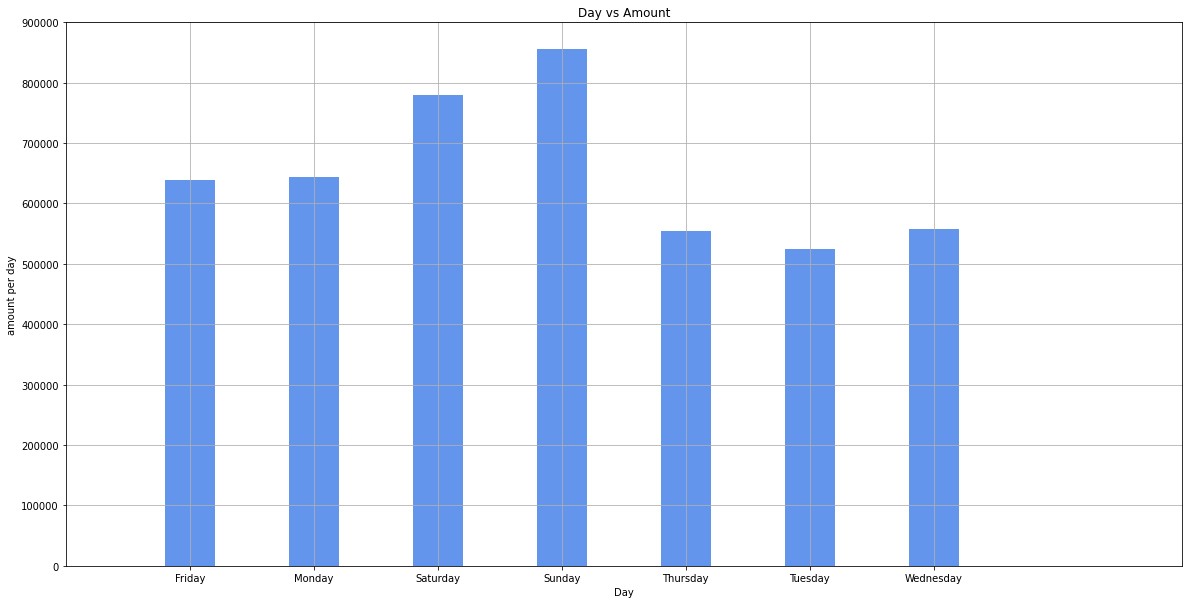

In [85]:
plt.figure(figsize=(20, 10))
x = df_data['day']
y = df_data['amount']
plt.bar(x,y,color ='cornflowerblue',width = 0.4)
plt.xlabel('Day')
plt.ylabel('amount per day')
plt.title('Day vs Amount')
plt.axis([-1, 8, 0, 900000])
plt.grid(True)
plt.show()

In [86]:
hour_df=df.groupby(['hour']).sum().reset_index()

In [87]:
hour_df

,hour,order_id,user_id,paid_cash,amount,month
0,0,78999963730210592,3197288640897099,6919,97351.44,10812
1,1,36976898153386544,1455324684636228,3243,41990.67,5062
2,2,17624613844534012,708159934133673,1589,19124.31,2413
3,3,8711361421661732,353686193987931,745,9106.30,1193
4,4,4124858389874080,164781182786472,347,4096.80,565
5,5,2506205224774624,99331160682642,221,2315.60,343
6,6,6118551254527240,235206120665334,423,4057.80,837
7,7,32596317679955272,1300326722628927,2414,20947.43,4459
8,8,92341350779450816,3686466564723054,7153,60039.40,12634
9,9,149432599245829024,5922333998114562,11566,100452.65,20450


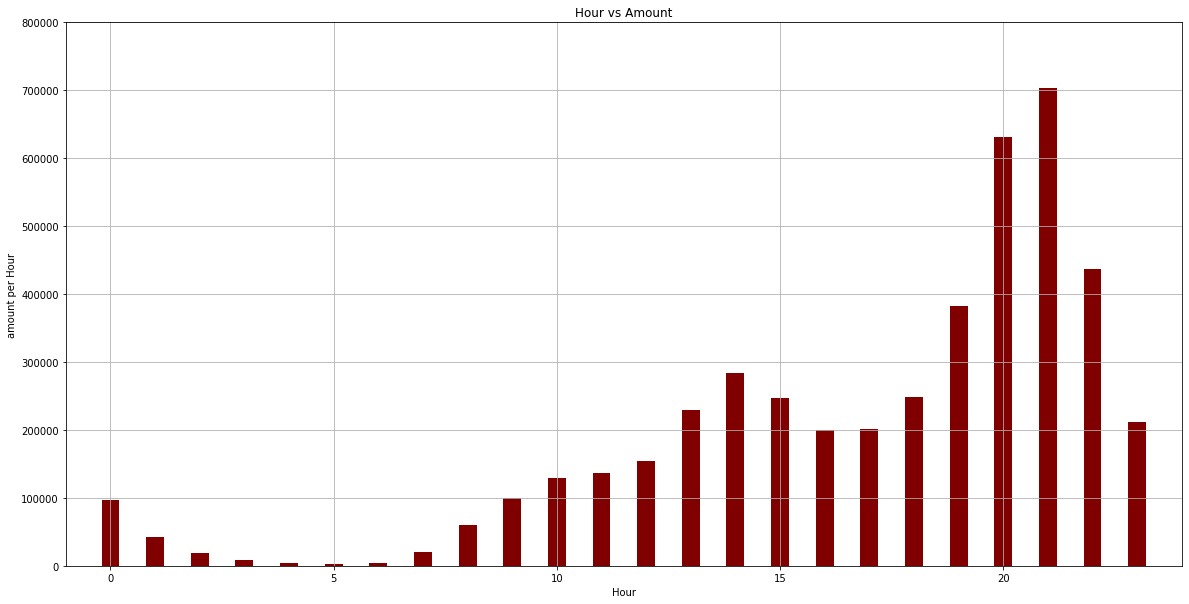

In [88]:
plt.figure(figsize=(20, 10))
x = hour_df['hour']
y = hour_df['amount']
plt.bar(x,y,color ='maroon',width = 0.4)
plt.xlabel('Hour')
plt.ylabel('amount per Hour')
plt.title('Hour vs Amount')
plt.axis([-1, 24, 0, 800000])
plt.grid(True)
plt.show()

In [89]:
df[['Breakfast/Gen_Foods']] = df[['cuisine']].replace(['Italian','Meat','Street food'], ['General Foods','General Foods','General Foods'])

In [90]:
df

,order_id,user_id,city,cuisine,paid_cash,amount,order_date,month,day,hour,Breakfast/Gen_Foods
423838,7202715412520,324194370654,Ρόδος,Meat,True,15.70,2022-01-01 00:06:07+00:00,1,Saturday,0,General Foods
400598,7202716839988,589959505422,Ξάνθη,Meat,True,2.20,2022-01-01 00:12:38+00:00,1,Saturday,0,General Foods
265457,7202717043912,13585910667,Ρόδος,Meat,True,5.70,2022-01-01 00:13:01+00:00,1,Saturday,0,General Foods
385888,7202718325720,12452144964,Ρόδος,Meat,False,7.10,2022-01-01 00:16:42+00:00,1,Saturday,0,General Foods
84663,7202718500512,339443474076,Βόλος,Breakfast,True,7.00,2022-01-01 00:17:11+00:00,1,Saturday,0,Breakfast
...,...,...,...,...,...,...,...,...,...,...,...
440325,7404764768320,48778318953,Λάρισα,Meat,True,5.70,2022-01-31 23:59:17+00:00,1,Monday,23,General Foods
24987,7404765059640,169301119407,Ξάνθη,Breakfast,False,5.20,2022-01-31 23:59:25+00:00,1,Monday,23,Breakfast
483696,7404765613148,29730071847,Λάρισα,Street food,True,9.75,2022-01-31 23:59:35+00:00,1,Monday,23,General Foods
526260,7404765671412,102344123049,Ιωάννινα,Meat,True,7.50,2022-01-31 23:59:37+00:00,1,Monday,23,General Foods


Text(0, 0.5, 'orders')

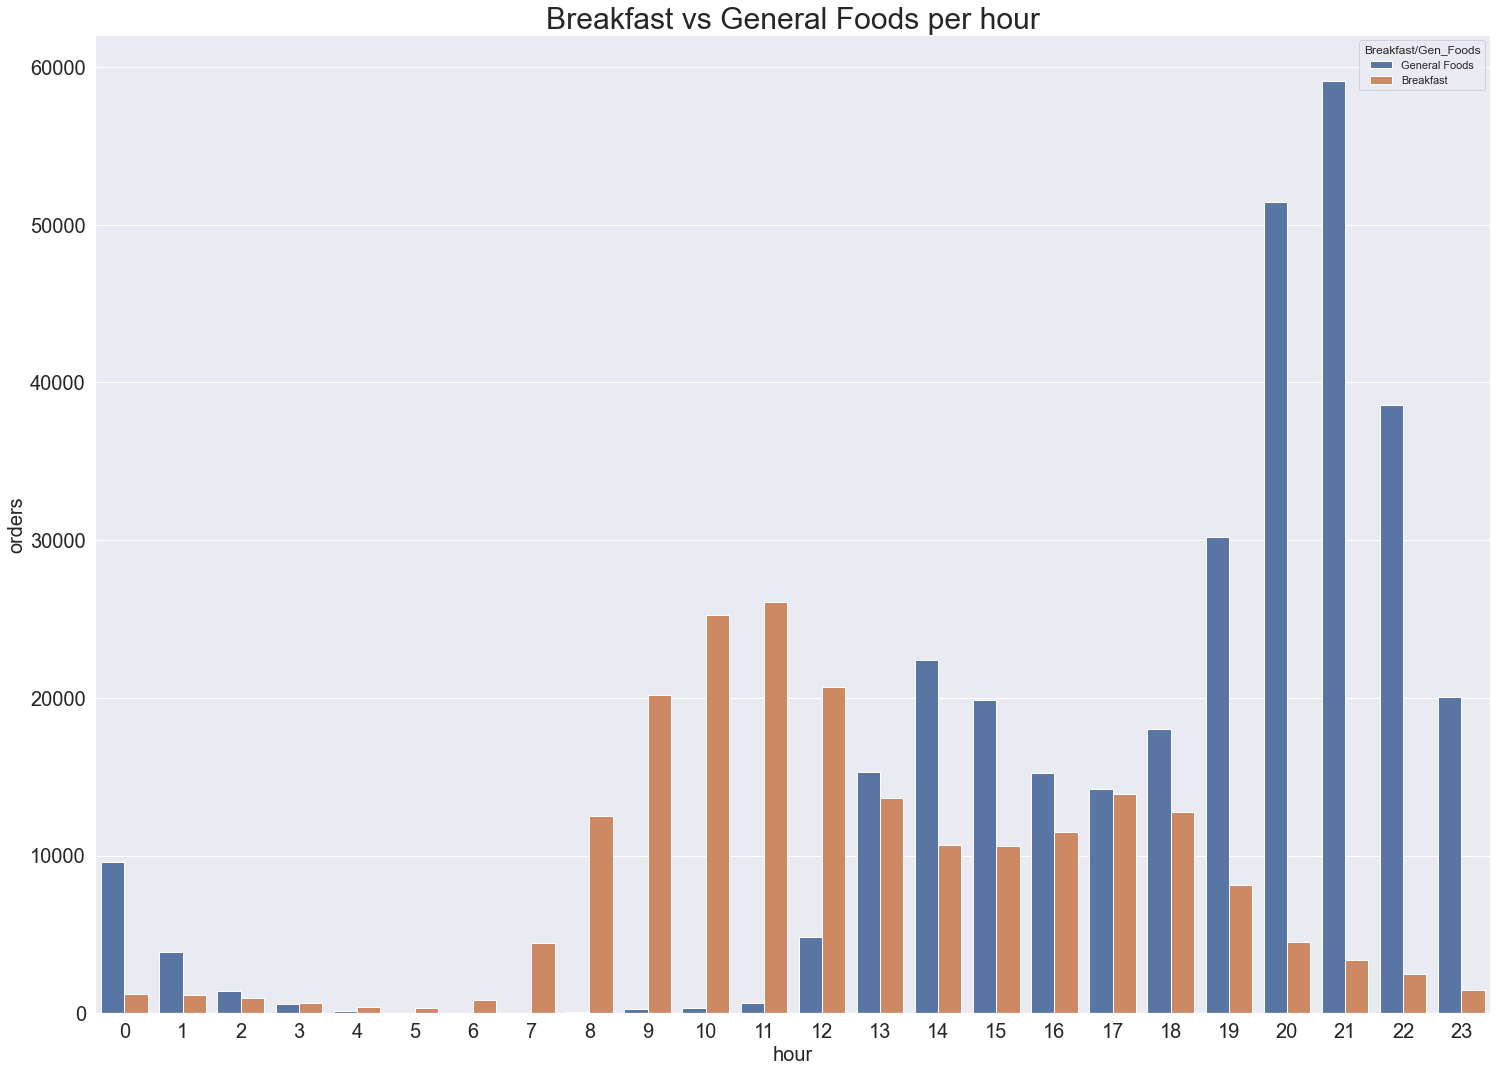

In [92]:
sns.countplot(x='hour',hue='Breakfast/Gen_Foods',data=df)
sns.set(rc={'figure.figsize':(25,18)})
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.title("Breakfast vs General Foods per hour",fontsize=30)
plt.xlabel('hour', fontsize=20)
plt.ylabel('orders', fontsize=20)

In [93]:
#percentage of orders do the top 10 users of each city contribute to their customers

In [94]:
freq

,user_id,city,order_id
0,44118921,Λαμία,1
1,108938802,Λέρος,3
2,110361993,Ρόδος,11
3,138437670,Άρτα,1
4,144777339,Αίγιο,14
...,...,...,...
124226,685557444369,Ξάνθη,1
124227,685561325799,Λάρισα,1
124228,685561843323,Βόλος,1
124229,685566242277,Δράμα,1


In [95]:
top_ten=freq.loc[freq.groupby('city')['order_id'].nlargest(10).index.get_level_values(1)]
top_ten.rename(columns = {'order_id':'Num_of_orders_of_top'}, inplace = True)

In [96]:
top_ten

,user_id,city,Num_of_orders_of_top
23628,111748957320,Άνδρος,2
122984,681815357706,Άνδρος,2
99596,576101506512,Άνδρος,1
104957,603530537274,Άνδρος,1
107032,616626093951,Άνδρος,1
...,...,...,...
40159,184394836248,Φλώρινα,21
52860,236426828589,Φλώρινα,21
34161,159220916316,Φλώρινα,20
64883,291438206598,Φλώρινα,20


In [97]:
top_ten_new=top_ten.set_index('city')

In [98]:
top_ten_new=top_ten_new.groupby(['city']).sum()

In [99]:
freq_all=freq.groupby(['city']).sum()
freq_all.rename(columns = {'order_id':'Num_of_orders_of_all'}, inplace = True)
freq_all

,user_id,Num_of_orders_of_all
city,,
Άνδρος,3275319217443,8
Άργος,291926705911365,2595
Άρτα,646422559857627,6985
Έδεσσα,204426904370241,1659
Αίγινα,10424760219720,66
Αίγιο,595789415222715,7369
Αγρίνιο,2193647296044456,33332
Αλίαρτος,1415764013076,23
Αλεξάνδρεια,49253280614811,305


In [100]:
top_10_contr=pd.merge(freq_all,top_ten_new, left_index=True, right_index=True)

In [101]:
top_10_contr['perc_of_orders']=top_10_contr['Num_of_orders_of_top']/top_10_contr['Num_of_orders_of_all']

In [103]:
top_10_contr.sort_values(by='perc_of_orders',ascending=False)

,user_id_x,Num_of_orders_of_all,user_id_y,Num_of_orders_of_top,perc_of_orders
city,,,,,
Άνδρος,3275319217443,8,3275319217443,8,1.000000
Βασιλικό,1017752606682,8,1017752606682,8,1.000000
Φιλιατρά,2565117021432,10,2565117021432,10,1.000000
Αλίαρτος,1415764013076,23,1415764013076,23,1.000000
Λεωνίδιο,113870676339,2,113870676339,2,1.000000
Γαργαλιάνοι,2010415649844,14,2010415649844,14,1.000000
Ιστιαία,4606083665568,26,2754228959559,21,0.807692
Μεγαλόπολη,6114341249877,40,2728070967741,31,0.775000
Νάξος,5709797008650,47,2618547234240,35,0.744681
